        Analysis of the Zomato dataset with the aim of identifying valuable insights is being undertaken

In [2]:
#Importing libraries
import cufflinks as cf
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# uploading zomato dataset file
data = pd.read_csv("zomato.csv")

In [4]:
#using head top 5 index will be executed
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,Yes,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,Yes,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
# Column of dataset in list 
list(data.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [16]:
#shape of dataset give no. of columns and rows
data.shape

(9551, 21)

In [10]:
#using info can check the data types and non null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
# Counting number  of data in each column
data.count()

Restaurant ID           9551
Restaurant Name         9551
Country Code            9551
City                    9551
Address                 9551
Locality                9551
Locality Verbose        9551
Longitude               9551
Latitude                9551
Cuisines                9542
Average Cost for two    9551
Currency                9551
Has Table booking       9551
Has Online delivery     9551
Is delivering now       9551
Switch to order menu    9551
Price range             9551
Aggregate rating        9551
Rating color            9551
Rating text             9551
Votes                   9551
dtype: int64

In [14]:
#checking null value in dataset
data.isnull().sum()  #isnull showing each column name and null value

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
# Description of dataset
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Data analysis
1. Find the missing data (null value) in the column
2. Droping the null value rows to minimize the error
3. Checking original dataset with new dataset using shape function

In [28]:
#1. Find the missing data in the column
missing_col = [x for x in data.columns if data[x].isnull().sum() >0]
missing_col

['Cuisines']

In [35]:
#2. Droping null value rows
datanew = data.dropna(subset=['Cuisines'])

In [ ]:
datanew.isnull().sum() #checking dropped values

In [37]:
#3. Checking original dataset shape and new dataset shape
data.shape # original dataset

(9551, 21)

In [39]:
datanew.shape # new dataset 

(9542, 21)

## 9  Total 9 null values were identified from the dataset and all the null value containg values were removed from the dataset. 

# The country coulmn has merged with an original dataset based on given country code to find which top 3 countries has maximum food order.

In [40]:
# uploading dataset with country code for zomato.
dataxlsx = pd.read_excel("Country-Code.xlsx")

In [41]:
#using head top 5 index will be exicuted
dataxlsx.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [43]:
# Column of dataset  
dataxlsx.columns

Index(['Country Code', 'Country'], dtype='object')

In [84]:
#Merging both the datasets
datamerge= pd.merge(data,dataxlsx,on ='Country Code',how='left')

In [85]:
# Merged dataset
datamerge

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,Yes,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,Yes,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,Yes,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,Yes,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,Yes,No,No,4,4.0,Green,Very Good,901,Turkey


In [87]:
#Checking whether the country column has merged with original dataset
list(datamerge.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

#Finding the Zomatos presence accross the world


In [137]:
# unique country value label chart 
Country_val = datamerge.Country.value_counts().values

In [138]:
Country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [144]:
# TO getnique country names 
country_names = datamerge.Country.value_counts().index

In [145]:
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x10eb02407f0>,
 [Text(-1.07479320772197, 0.23413577393196094, 'India'),
  Text(1.056503577535216, -0.3062681678779072, 'United States'),
  Text(1.093560093908513, -0.118854200644337, 'United Kingdom'),
  Text(1.0979610170116392, -0.06694479160298568, 'Brazil'),
  Text(1.0997733864424146, -0.022327079365287286, 'UAE')],
 [Text(-0.5862508405756199, 0.12771042214470596, '93.17%'),
  Text(0.5762746786555722, -0.1670553642970403, '4.67%'),
  Text(0.596487323950098, -0.06482956398782018, '0.86%'),
  Text(0.598887827460894, -0.03651534087435582, '0.65%'),
  Text(0.5998763926049533, -0.012178406926520337, '0.65%')])

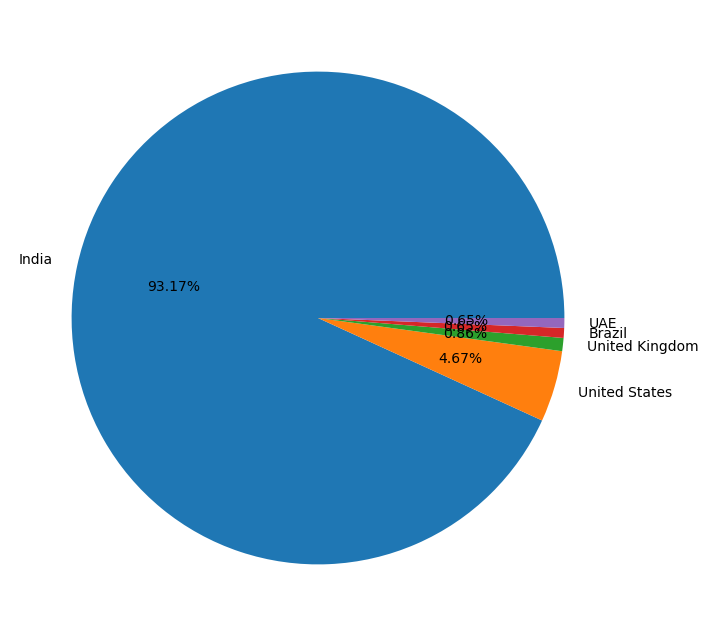

In [157]:
#plotting pie chart to display top 5 countries where zomato present
plt.figure(figsize=(8,8))
plt.pie(Country_val[:5],labels=country_names[:5],autopct="%.2f%%")

                    Zomato maximum presence in india followed by USA and Uk

([<matplotlib.patches.Wedge at 0x10eb1cf9030>,
 [Text(0.7849711694285245, 0.7705973417849394, 'Indonesia'),
  Text(-0.7259169915527991, 0.8264650757139915, 'Singapore'),
  Text(-0.8899186877588755, -0.6465637858537403, 'Qatar'),
  Text(0.5616943265628684, -0.9457798282407411, 'Sri Lanka'),
  Text(1.0880007725323886, -0.16203184553946726, 'Canada')],
 [Text(0.42816609241555875, 0.42032582279178515, '24.71%'),
  Text(-0.3959547226651631, 0.4507991322076317, '23.53%'),
  Text(-0.48541019332302293, -0.3526711559202219, '23.53%'),
  Text(0.3063787235797464, -0.5158799063131314, '23.53%'),
  Text(0.5934549668358482, -0.08838100665789121, '4.71%')])

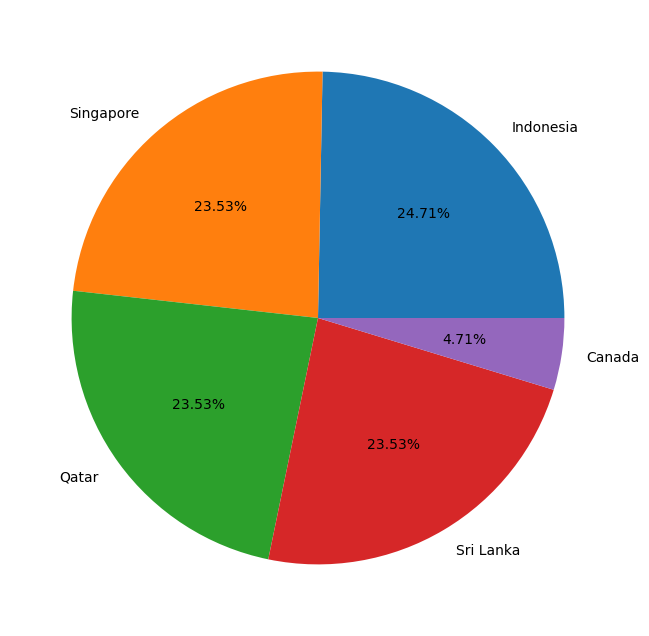

In [162]:
#pie chart displaying least 5 country presence for Zomato 
plt.figure(figsize=(8,8))
plt.pie(Country_val[10:15],labels=country_names[10:15],autopct="%.2f%%")

             Zomatos least presence country is Canada  followed by Srilanka and Qatar

                     Check top 3 country's has online food delivery


In [179]:
datamerge.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,Yes,No,No,4,4.4,Green,Very Good,270,Phillipines


In [190]:
# Country with online delivery 
datamerge.groupby(['Has Online delivery','Country']).size().reset_index().head(20)

,Has Online delivery,Country,0
0,No,Australia,3
1,No,Canada,2
2,No,India,3978
3,No,Singapore,3
4,No,UAE,32
5,No,United States,83
6,Yes,Australia,21
7,Yes,Brazil,60
8,Yes,Canada,2
9,Yes,India,2909


In [164]:
# value counts
datamerge[datamerge['Has Online delivery'] == 'Yes'].Country.value_counts()

India             2909
United States      351
United Kingdom      80
Brazil              60
South Africa        60
New Zealand         40
Turkey              34
UAE                 28
Phillipines         22
Australia           21
Indonesia           21
Qatar               20
Sri Lanka           20
Singapore           17
Canada               2
Name: Country, dtype: int64

In [165]:
datamerge[datamerge['Has Online delivery'] == 'Yes'].groupby('Country').count()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Country,,,,,,,,,,,,,,,,,,,,,
Australia,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Brazil,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
Canada,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
India,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909,...,2909,2909,2909,2909,2909,2909,2909,2909,2909,2909
Indonesia,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
New Zealand,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
Phillipines,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Qatar,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Singapore,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17


In [183]:
#index Country_name
Country_name=datamerge.Country.value_counts().index

In [184]:
Country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [186]:
# Count of value of Country_val
Country_val=datamerge.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x10eb2621060>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

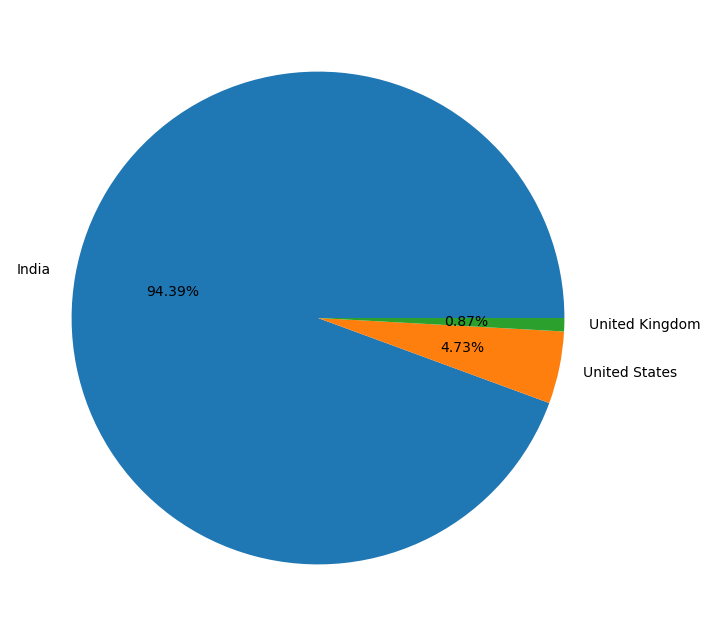

In [191]:
# Plotting pie chart having top 3 cities 
plt.figure(figsize=(8,8))
plt.pie(Country_val[:3],labels=Country_name[:3],autopct="%.2f%%")

                     Maximum number of online delivery is in India(94.39%)

In [192]:
datamerge.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


                               Check top 3 city  in online delivery food in zomato

In [200]:
# Citywith online delivery 
datamerge.groupby(['Has Online delivery','City']).size().reset_index().head(10)

,Has Online delivery,City,0
0,No,Abu Dhabi,9
1,No,Agra,20
2,No,Ahmedabad,10
3,No,Allahabad,15
4,No,Dubai,14
5,No,Faridabad,49
6,No,Ghaziabad,15
7,No,Goa,20
8,No,Gurgaon,693
9,No,Guwahati,21


In [195]:
# value counts
datamerge[datamerge['Has Online delivery'] == 'Yes'].City.value_counts()

New Delhi         1394
Noida              471
Gurgaon            425
Faridabad          202
Amritsar            21
                  ... 
Lorn                 1
Lincoln              1
Lakeview             1
Lakes Entrance       1
Princeton            1
Name: City, Length: 119, dtype: int64

In [196]:
datamerge[datamerge['Has Online delivery'] == 'Yes'].groupby('City').count()

,Restaurant ID,Restaurant Name,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
City,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Ahmedabad,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Albany,20,20,20,20,20,20,20,20,17,20,...,20,20,20,20,20,20,20,20,20,20
Allahabad,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Amritsar,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vadodara,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Varanasi,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Vizag,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [201]:
#index City_name
City_name=datamerge.City.value_counts().index

In [202]:
# Count of value of City_val
City_val=datamerge.City.value_counts().values

([<matplotlib.patches.Wedge at 0x10eb687dc90>,
 [Text(-0.6836225695617262, 0.8617773392157762, 'New Delhi'),
  Text(0.24897482286810813, -1.0714530029720364, 'Gurgaon'),
  Text(0.9941442744692855, -0.47082604169686504, 'Noida')],
 [Text(-0.37288503794275973, 0.47006036684496877, '71.35%'),
  Text(0.13580444883714987, -0.5844289107120197, '14.57%'),
  Text(0.542260513346883, -0.25681420456192633, '14.08%')])

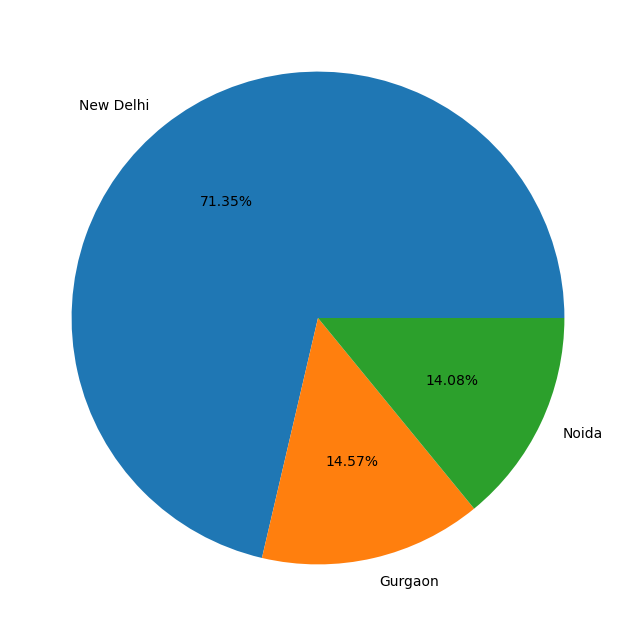

In [203]:
# Plotting pie chart having top 3 cities 
plt.figure(figsize=(8,8))
plt.pie(City_val[:3],labels=City_name[:3],autopct="%.2f%%")

                     New Delhi has Maximum online delivery in zomato

In [207]:
datamerge.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [208]:
datamerge.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [210]:
# Creating seperate dataframe to find out famous cuisines
data_cuisines =datamerge.groupby(['Cuisines','Country','Price range']).size().reset_index().rename(columns = {0:'Cuisines count'})

In [211]:
data_cuisines.head(2)

,Cuisines,Country,Price range,Cuisines count
0,Afghani,India,1,1
1,Afghani,India,2,3


In [212]:
# Finding cuisines counts 
Cuisines_count = data_cuisines.Cuisines.value_counts().values

In [214]:
# Index value (Cuisines name) 
Cuisines_name= data_cuisines.Cuisines.value_counts().index

([<matplotlib.patches.Wedge at 0x10eb8470af0>,
 [Text(0.7778174593052024, 0.7778174593052024, 'Cafe'),
  Text(-0.69783261258001, 0.8503114986990109, 'Italian'),
  Text(-1.0162674857624157, -0.4209517756015987, 'American'),
  Text(-0.053974441760159836, -1.0986750018256897, 'Chinese'),
  Text(0.9435014710002992, -0.5655130186125441, 'Indian')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.00%'),
  Text(-0.3806359704981872, 0.46380627201764224, '21.88%'),
  Text(-0.5543277195067721, -0.2296100594190538, '18.75%'),
  Text(-0.029440604596450815, -0.5992772737231035, '17.19%'),
  Text(0.5146371660001632, -0.3084616465159331, '17.19%')])

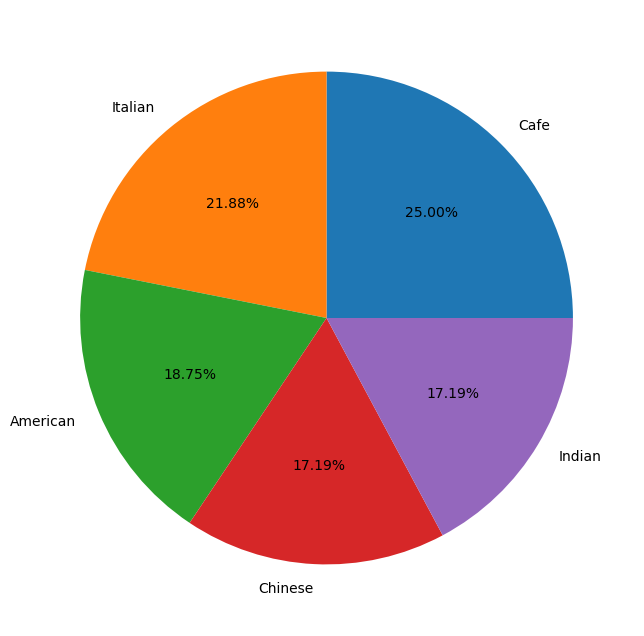

In [216]:
# Plotting pie chart to figure out famous cuisines
plt.figure(figsize=(8,8))
plt.pie(Cuisines_count[:5],labels=Cuisines_name[:5],autopct="%.2f%%")

                       Top 3 Most famous cuisines on zomato are cafe(25.00%), 
                                        Italian(21.88%), 
                                        American(18.75%)